In [6]:
import ast
import pandas as pd
from datasets import load_dataset
from matplotlib import pyplot as plt

# Loading Dataset
datasets = load_dataset("lukebarousse/data_jobs")
df = datasets['train'].to_pandas()

# Cleaning Datasets
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) #str to date
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) #str to list to use explode

# Updating Datasets
df['job_month_number'] = df['job_posted_date'].dt.month # create month number column

<Axes: title={'center': 'Top Treding Skills for Data Analyst'}, xlabel='Months', ylabel='Counts'>

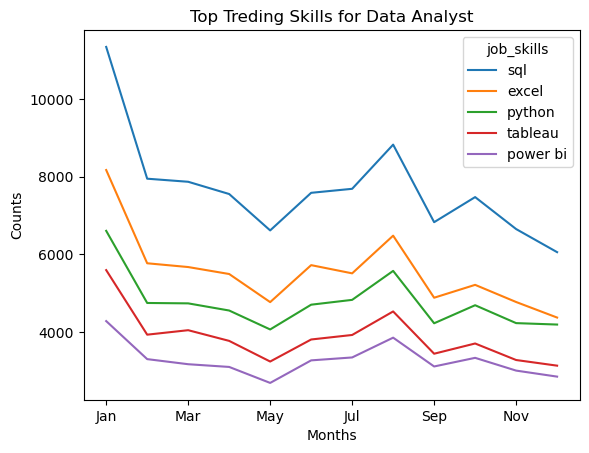

In [36]:
# Creating a copy of orginal dataframe
df_DA = df[df['job_title_short'] == "Data Analyst"].copy()

# explode the list
df_DA_exploded = df_DA.explode('job_skills')

# Pivot the dataframe
# Note: to fill the NaN values in pivot table use fill_value=0
df_DA_pivot= df_DA_exploded.pivot_table(index='job_month_number', columns='job_skills', aggfunc='size',fill_value=0)

#Create a Total sum column by using loc[] to sort values from the highest to the lowest
#Filtring the pivot by the index of that highest sorting
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_sorting = df_DA_pivot.loc['Total'].sort_values(ascending=False).index
df_DA_pivot = df_DA_pivot[df_DA_sorting]

#Drop total column
df_DA_pivot = df_DA_pivot.drop('Total')

# Change month number to word 
df_DA_pivot.reset_index(inplace=True)
df_DA_pivot['job_month'] = df_DA_pivot['job_month_number'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot.set_index('job_month',inplace=True)
df_DA_pivot.drop(columns='job_month_number',inplace=True)


#Selecting the first 5 column by using iloc[]
df_DA_pivot.iloc[:, :5]

#Visualization
df_DA_pivot.iloc[:, :5].plot(kind='line', title='Top Treding Skills for Data Analyst', xlabel='Months', ylabel='Counts')